In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score, ConfusionMatrixDisplay,classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import the dataset
df = pd.read_csv('cancer_patient.csv')

In [4]:
# read the first five rows
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
# read the last five rows
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [6]:
print(df)

     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk

In [7]:
# nuber of rows and columns
df.shape

(1000, 26)

In [8]:
# Data type of each colunm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [9]:
# Statistic summaryb
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


# Preprocessing

In [10]:
# remove the unwanted columns
df = df.loc[:,df.columns[2:26]]

In [11]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [12]:
# check the number of null values
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [13]:
# replace spaces with uderscores in column names
df.columns = df.columns.str.replace(' ','_')

In [14]:
df

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [15]:
# Define the mapping for encoding
level_mapping = {'Low': -1, 'Medium': 0, 'High': 1}

# Encode the values in the "Level" column using the mapping
df['Level'] = df['Level'].map(level_mapping)

In [16]:
df

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,-1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,1
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,1
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1


# EDA

In [17]:
corr_matrix = df.corr()

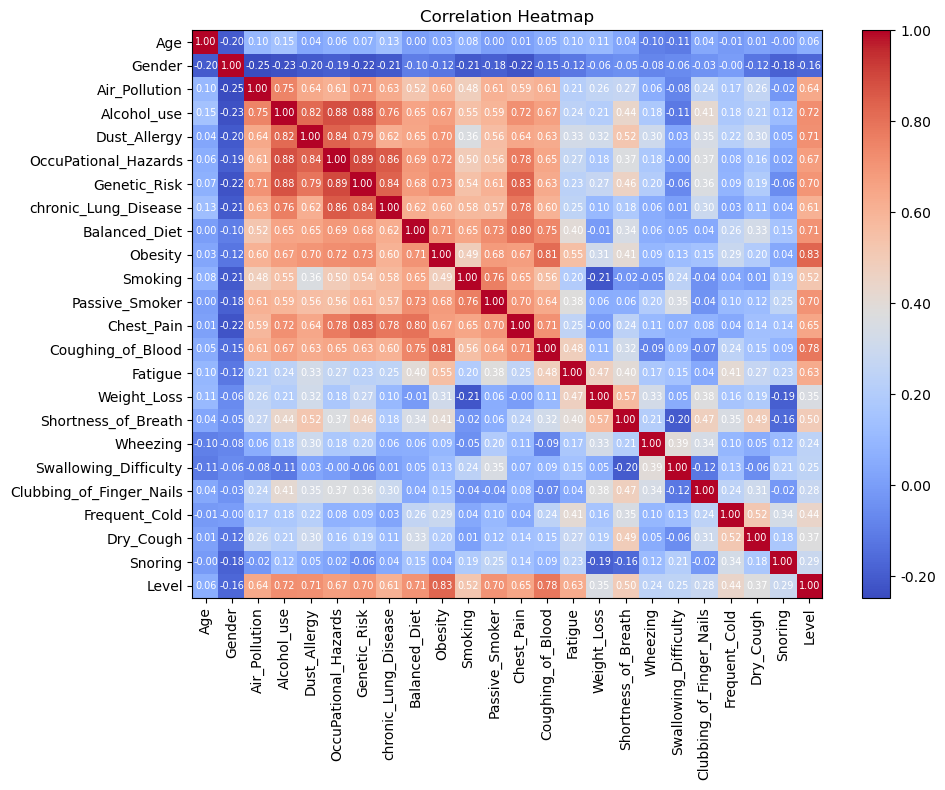

In [18]:
# create heapmap
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix,cmap='coolwarm',aspect='auto')
plt.colorbar(format='%.2f')
plt.title('Correlation Heatmap')
for (i, j), val in np.ndenumerate(corr_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=7)
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()

plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

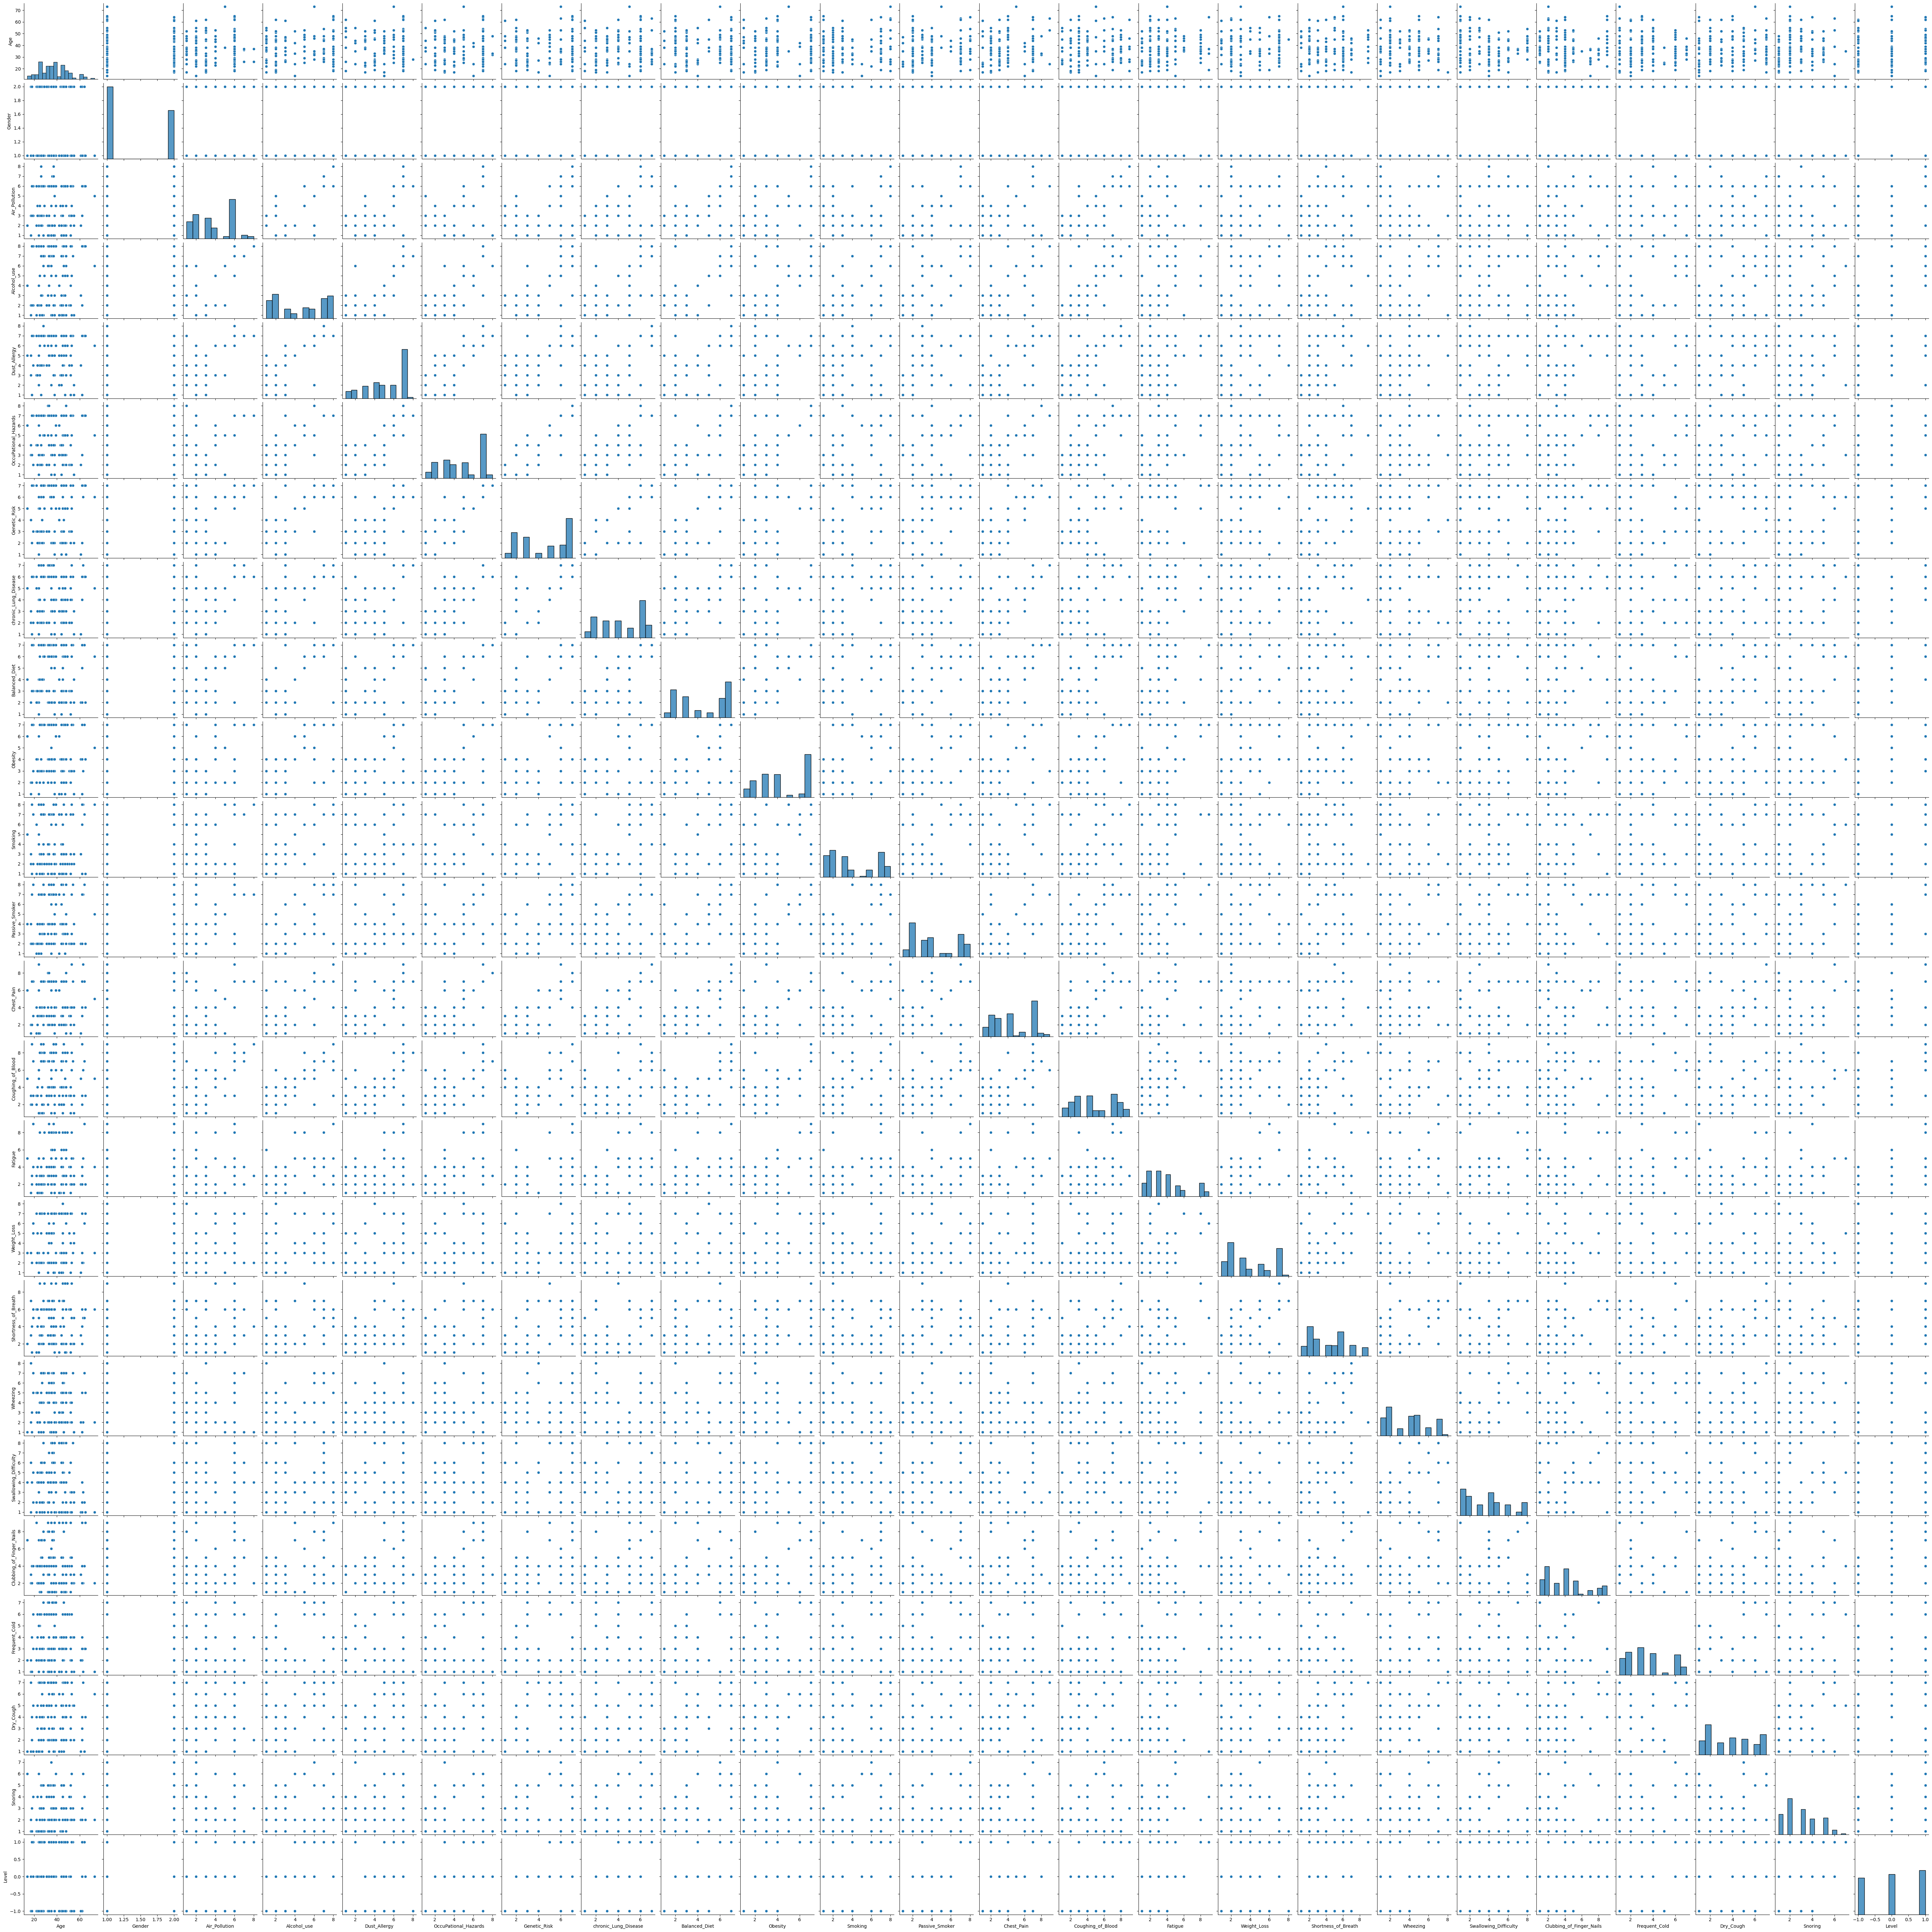

In [19]:
# Pair plot
sns.pairplot(df)

In [20]:
#obtain the average obesity for each level
pd.pivot_table(df,index='Level',values='Obesity')

,Obesity
Level,
-1,2.409241
0,3.903614
1,6.682192


In [21]:
# Define the reverse mapping for decoding
reverse_level_mapping = {-1: 'Low', 0: 'Medium', 1: 'High'}

# Decode the values in the "Level" column using the reverse mapping
df['Level'] = df['Level'].map(reverse_level_mapping)

In [22]:
df

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


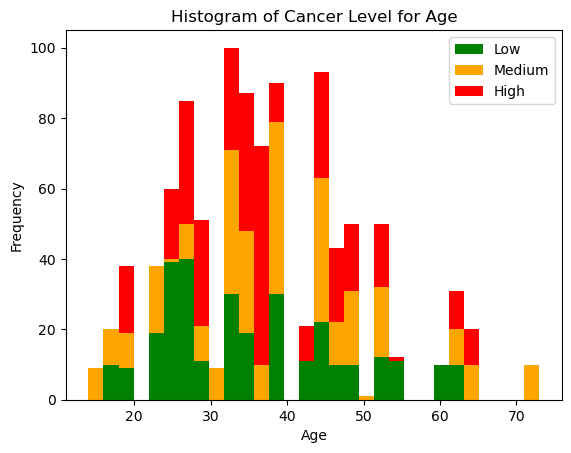

In [23]:
# Load the dataset
cancer_patient = pd.read_csv("cancer_patient.csv")

# Plot the histogram with segmented bars
plt.hist([cancer_patient[cancer_patient['Level'] == 'Low']['Age'],
          cancer_patient[cancer_patient['Level'] == 'Medium']['Age'],
          cancer_patient[cancer_patient['Level'] == 'High']['Age']],
         bins=30, stacked=True, color=['green', 'orange', 'red'], label=['Low', 'Medium', 'High'])

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Histogram of Cancer Level for Age")

# Add legend
plt.legend()

# Show plot
plt.show()

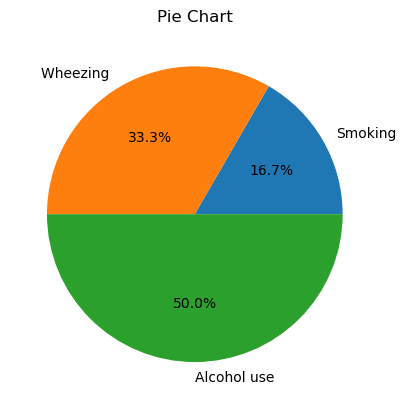

In [24]:
# pie chart
values= [1,2,3]
labels=['Smoking','Wheezing ','Alcohol use',]
# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()

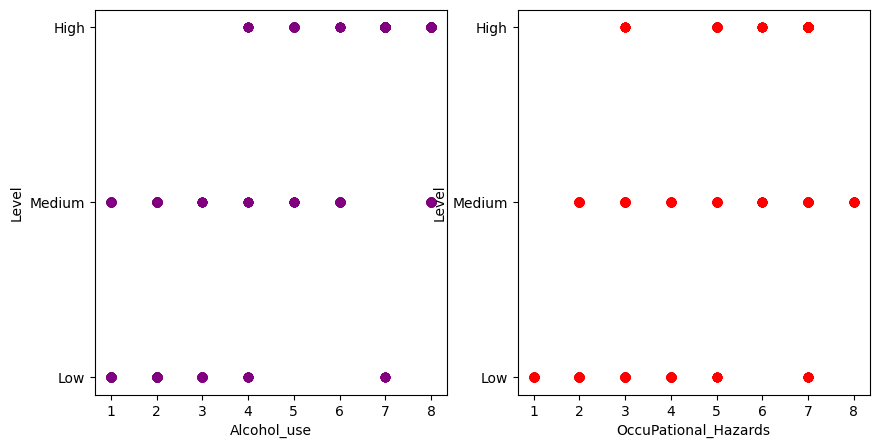

In [25]:
column_pairs=[('Alcohol_use','Level'),('OccuPational_Hazards','Level')]
fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(df[column_pairs[0][0]],df[column_pairs[0][1]],color='purple')
axs[0].set_xlabel(column_pairs[0][0])
axs[0].set_ylabel(column_pairs[0][1])

axs[1].scatter(df[column_pairs[1][0]],df[column_pairs[1][1]],color='red')
axs[1].set_xlabel(column_pairs[1][0])
axs[1].set_ylabel(column_pairs[1][1])

plt.show()

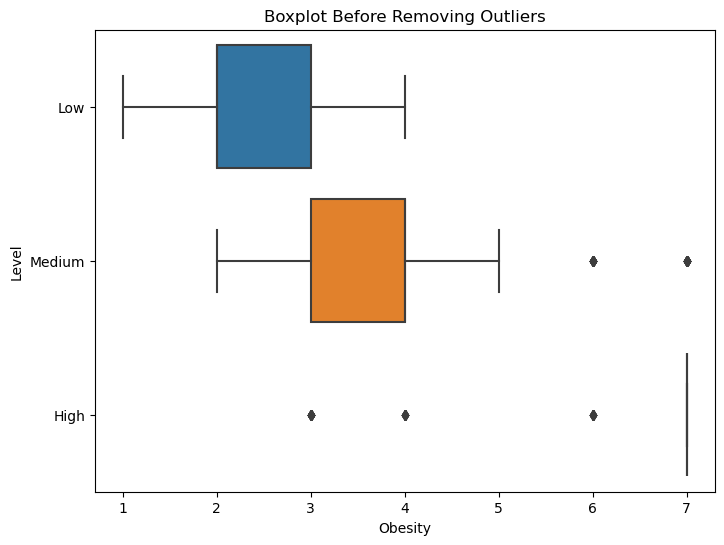

In [26]:
# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust the size as needed
plt.title('Boxplot Before Removing Outliers')
# Create the boxplot 
sns.boxplot(x='Obesity', y='Level', data=df)
# Show the plot
plt.show()

In [27]:
Q1=df['Obesity'].quantile(0.25)
Q3=df['Obesity'].quantile(0.75)
IQR=Q3-Q1

#identify outliers
outliers=((df['Obesity']< Q1-1.5*IQR) | df['Obesity'] > Q3+1.5*IQR) 

#count the number of outliers
outliers.sum()

0

In [28]:
def detect_outliers(cancer_patient):
    Q1 = cancer_patient.quantile(0.25)
    Q3 = cancer_patient.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (cancer_patient < lower_bound) | (cancer_patient > upper_bound)
    return outliers

# Calculate outliers for a specific column 
outliers = detect_outliers(df['Obesity'])

# Print the number of outliers and the indices of outlier data points
print("Number of outliers:", outliers.sum())
print("Indices of outliers:")
print(outliers[outliers].index)

Number of outliers: 0
Indices of outliers:
Index([], dtype='int64')


In [29]:
df=df[~outliers]

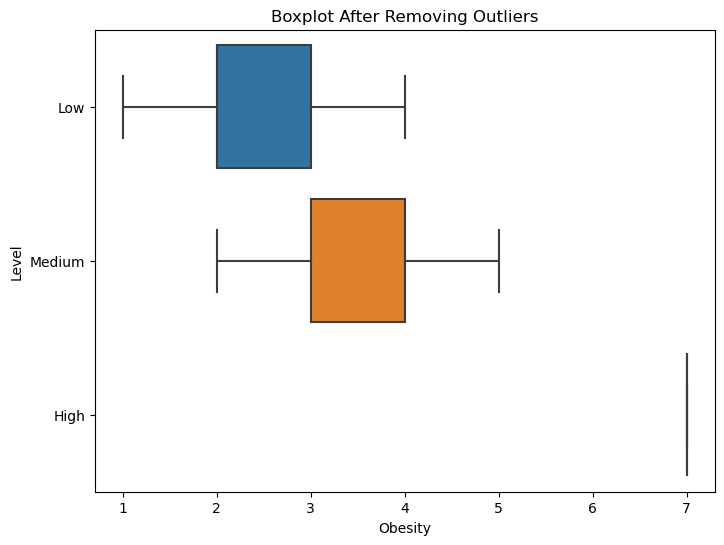

In [30]:
# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust the size as needed
plt.title('Boxplot After Removing Outliers')
# Set the figure size
# Create the boxplot without outliers
sns.boxplot(x='Obesity', y='Level', data=df, showfliers=False)

# Show the plot
plt.show()

In [31]:
# We have to split the our dataset
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Level'])  # Features 
y = df['Level']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 23)
X_test shape: (200, 23)
y_train shape: (800,)
y_test shape: (200,)


# Data Modeling
## Decision Tree Classifier

In [32]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [33]:
feature_names = X.columns
labels = y.unique()

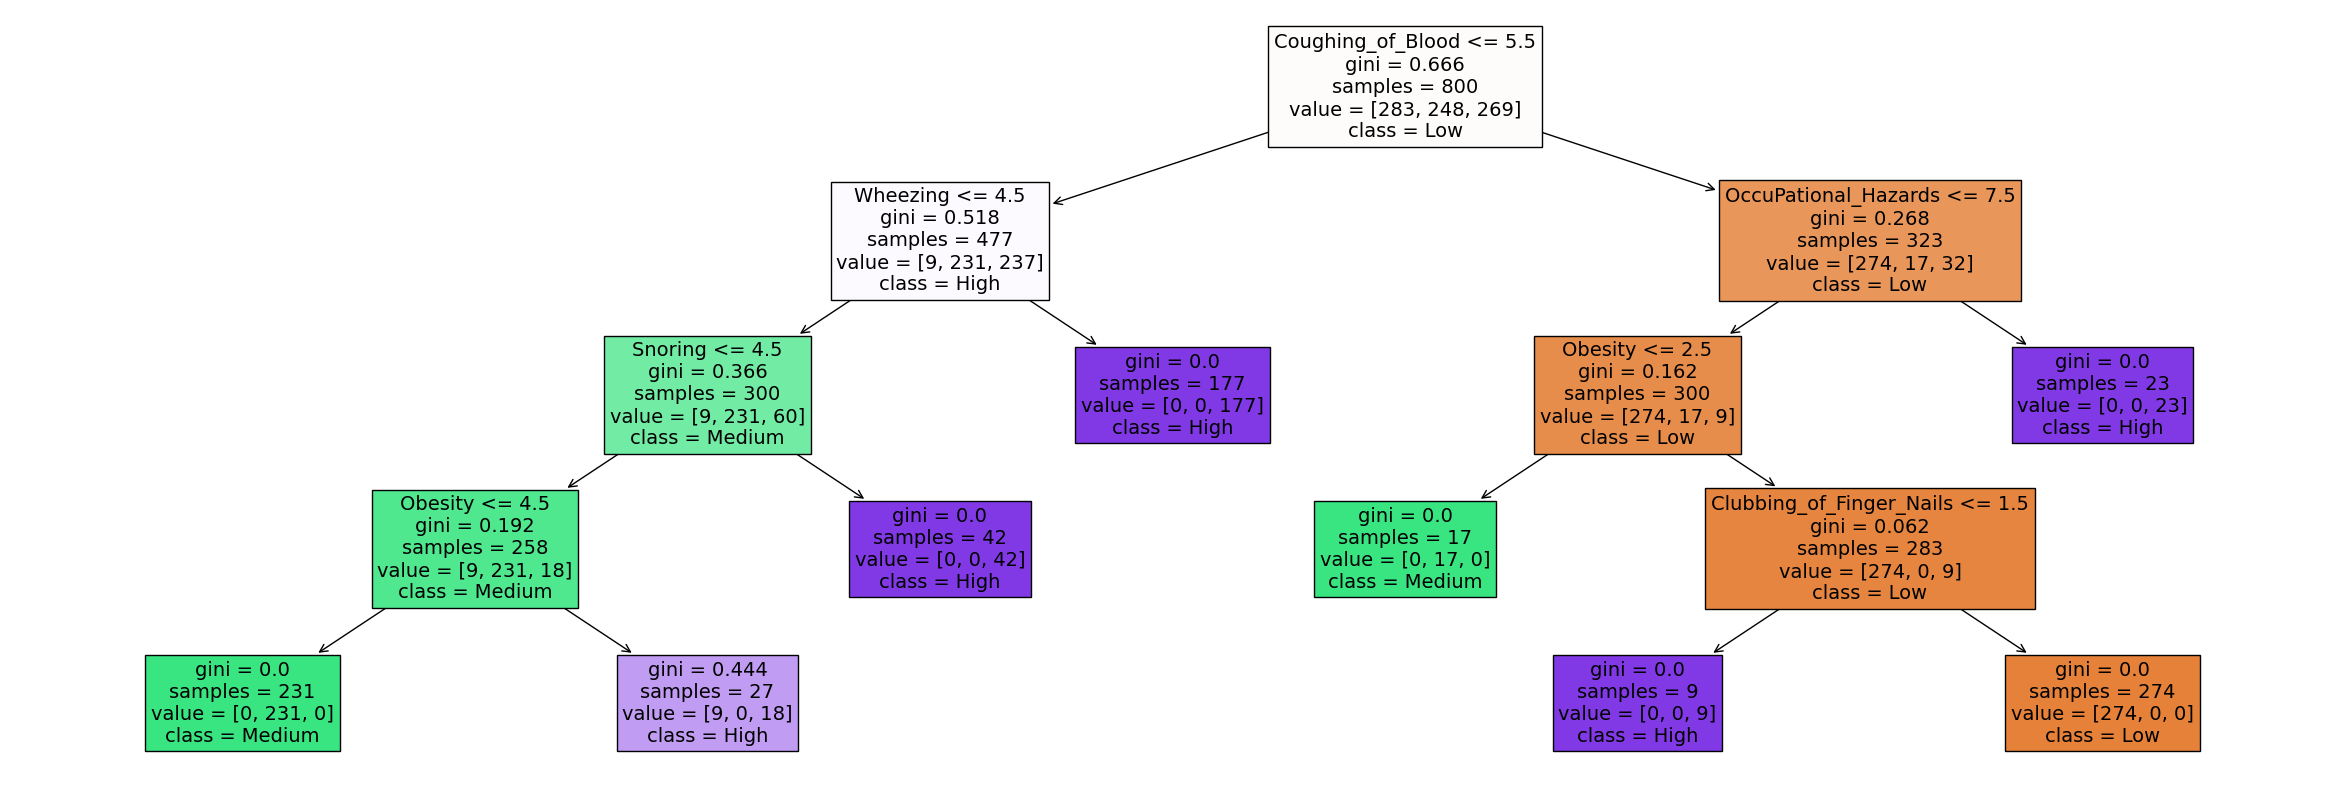

In [34]:
plt.figure(figsize=(30,10),facecolor='white')
a = tree.plot_tree(dt,feature_names=feature_names,class_names=labels,filled=True,fontsize=14)
plt.show() 

# Evaluate Model

In [35]:
# evaluate model
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Metrix:\n",cm)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score: " ,f1_score(y_test,y_pred,average='weighted'))

Confusion Metrix:
 [[81  0  1]
 [ 0 55  0]
 [ 0  0 63]]
Accuracy:  0.995
Precision:  0.995078125
Recall:  0.995
F1 Score:  0.9950043476160572


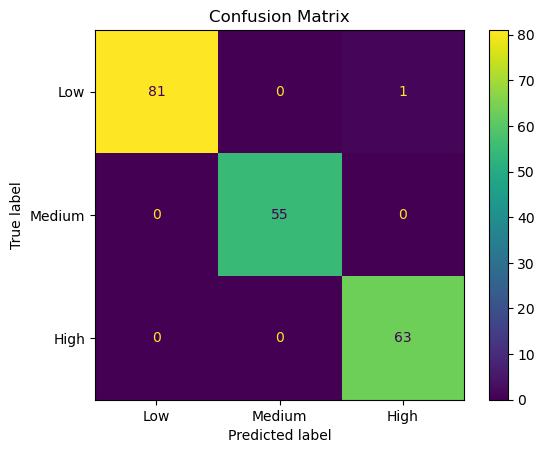

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low','Medium','High'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Define the mapping for encoding
level_mapping = {'Low': -1, 'Medium': 0, 'High': 1}

# Encode the values in the "Level" column using the mapping
df['Level'] = df['Level'].map(level_mapping)

In [38]:
import numpy as np

# Assuming df is your DataFrame containing the 'Obesity' and 'Level' columns

correlation_coefficient = np.corrcoef(df['Obesity'], df['Level'])

print("Correlation Coefficient between Obesity and Level:", correlation_coefficient[0, 1])


Correlation Coefficient between Obesity and Level: 0.8274350995887104
